新的用于论文图形，2018.4.14
--

In [18]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
from theano import shared
import pandas as pd
from matplotlib import gridspec
from sklearn.decomposition import PCA, KernelPCA

import scipy as sp
from theano.compile.ops import as_op
from numpy import arange, array, empty
# from Plot_raw import *

In [19]:
plt.style.use('default')
from pylab import *  

# 以下三行用于中文显示图形
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=9)
np.set_printoptions(precision=0, suppress=True)
# mpl.rcParams['font.sans-serif'] = ['SimHei']

def Plot_raw1(elec_year, elec_faults, Savefig):
# 画出原始图
    Company_names = ['地区A', '地区B', '地区C']
    k = np.array([0, 82, 166])
    j= 0
    # j, k1 = 0, 6
    plt.figure(figsize=(3.5, 2.5), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(7):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=3, linewidth=1)
        # j = j+k1
    ax.set_xlim(0.5, 12.5)
    ax.set_ylim(-0.1, 2.5)
    
    nodeType = dict(boxstyle = "round4", fc = "0.8")  
    label_f1 = "Noise"
    ax.text(4.8,2.4, label_f1, fontsize=9, verticalalignment="top", horizontalalignment="right")
    ax.annotate('',xy=(2.0,2.1),xytext=(3.1,2.3),bbox = nodeType, arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3'], fontsize='small')
    plt.yticks(fontsize='small')
    
    plt.xlabel(r"时间$t$/年", fontsize=14, fontproperties=font)
    plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
    plt.legend([Company_names[0]], loc='upper right', frameon=False, fontsize='small', prop=font)
    
    # plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New_A1.png', dpi = 200, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(3.5, 2.5), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(7, 14, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=3, linewidth=1)
        # j = j+k1
    ax.set_xlim(0.5, 12.5)
    ax.set_ylim(-0.02, 0.6)
    
    nodeType = dict(boxstyle = "round4", fc = "0.8")    
#     label_f1 = "Noise"
#     ax.text(3.3,0.55, label_f1, fontsize=9, verticalalignment="top", horizontalalignment="right")
    ax.annotate(u'叶节点', xy=(5.0,0.52), xytext=(3.5,0.53), bbox = dict(fc = "1"), arrowprops=dict(arrowstyle="->"))
    
    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3'], fontsize='small')
    plt.yticks(fontsize='small')
    
    plt.xlabel(r"时间$t$/年", fontsize=14, fontproperties=font)
    plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
    plt.legend([Company_names[1]], loc='upper right', frameon=False, fontsize='small', prop=font)
    # plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New_B2.png', dpi = 200, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(3.5, 2.5), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(14, 21, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=3, linewidth=1)
        # j = j+k1
    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3'], fontsize='small')
    
    plt.xlabel(r"时间$t$/年", fontsize=14, fontproperties=font)
    plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
    plt.legend([Company_names[2]], loc='upper left', frameon=False, fontsize='small', prop=font)

    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3'], fontsize='small')
    plt.yticks(fontsize='small')
    
    # plt.legend([ax1], [u'本文算法'], frameon=False, fontsize='small',loc='upper left', prop=font)

    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New_C3.png', dpi = 200, bbox_inches='tight')
    plt.show()
    return 0

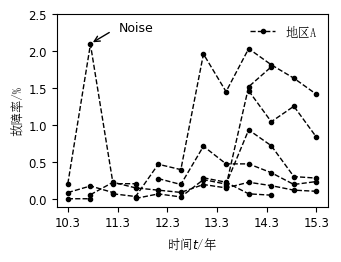

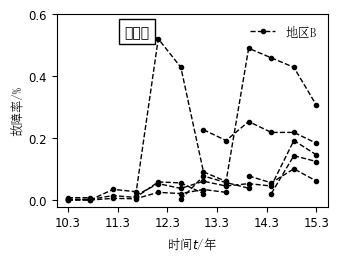

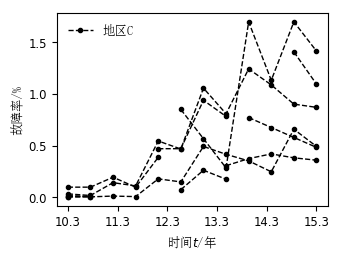

0

In [20]:
# 以下三行用于中文显示图形
from matplotlib.font_manager import FontProperties
# from pymc3 import get_data
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=9)
np.set_printoptions(precision=0, suppress=True)

Savefig = 0 # 控制图形显示存储
plt.style.use('default')
data_plot = pd.read_csv('XZnozero_12_stop.csv')
year_plot = data_plot.Year.values  # 观测时间值x1
year_plot = np.ma.masked_values(year_plot, value=-999)
# print(year_plot)

faults_plot = (data_plot.Fault.values)  # 数组形式,计算故障率大小
faults_plot = np.ma.masked_values(faults_plot, value=-999)
faults_plot = 100*faults_plot / data_plot.Nums.values

# 将故障率以6组一行形式组成数组,变成：21*6
year_plot2 = np.array([year_plot[i*12:(i+1)*12] for i in np.arange(21)])
faults_plot2 = np.array([faults_plot[i*12:(i+1)*12] for i in np.arange(21)])

year_plot2 = np.ma.masked_values(year_plot2, value=-999)
faults_plot2 = np.ma.masked_values(faults_plot2, value=100)

Plot_raw1(year_plot2, faults_plot2, Savefig)

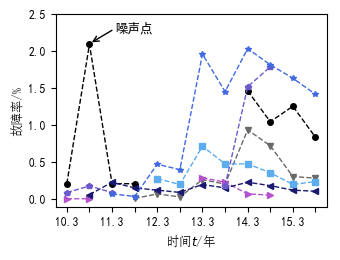

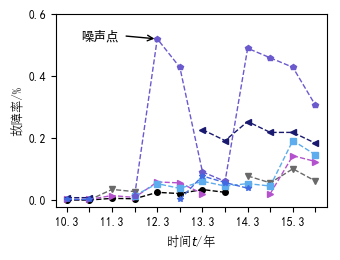

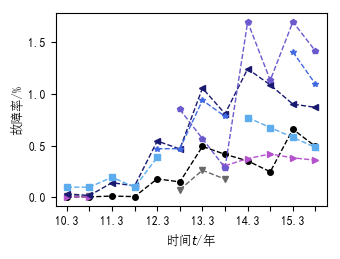

In [21]:
plt.style.use('default')
from pylab import *  

# 以下三行用于中文显示图形
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=9)
np.set_printoptions(precision=0, suppress=True)
mpl.rcParams['font.sans-serif'] = ['SimHei']
Color = ['#696969', '#000000', '#B452CD', '#191970', '#5CACEE', '#6A5ACD', '#4169E1']
# Color = ['#696969', '#000000', '#778899', '#191970', '#6495ED', '#6A5ACD', '#4169E1']
# Color = ['#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000']
# 画出原始图
Company_names = ['地区A', '地区B', '地区C']
k = np.array([0, 82, 166])
j= 0
    # j, k1 = 0, 6
plt.figure(figsize=(3.5, 2.5), facecolor='w')
ax = plt.subplot(1, 1, 1)

ax.plot(year_plot2[0], faults_plot2[0], 'kv--', markersize=4, linewidth=1,  c=Color[0])
ax.plot(year_plot2[1], faults_plot2[1], 'ko--', markersize=4, linewidth=1,  c=Color[1])
ax.plot(year_plot2[2], faults_plot2[2], 'k>--', markersize=4, linewidth=1,  c=Color[2])
ax.plot(year_plot2[3], faults_plot2[3], 'k<--', markersize=4, linewidth=1,  c=Color[3])
ax.plot(year_plot2[4], faults_plot2[4], 'ks--', markersize=4, linewidth=1,  c=Color[4])
ax.plot(year_plot2[5], faults_plot2[5], 'kp--', markersize=4, linewidth=1,  c=Color[5])
ax.plot(year_plot2[6], faults_plot2[6], 'k*--', markersize=4, linewidth=1,  c=Color[6])
        # j = j+k1
ax.set_xlim(0.5, 12.5)
ax.set_ylim(-0.1, 2.5)
    
nodeType = dict(boxstyle = "round4", fc = "0.8")  
# label_f1 = "Noise"
# ax.text(4.8,2.4, label_f1, fontsize=9, verticalalignment="top", horizontalalignment="right")
# ax.annotate('',xy=(2.0,2.1),xytext=(3.1,2.3),bbox = nodeType, arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
ax.text(4.8,2.4, u'噪声点', fontsize=9, verticalalignment="top", horizontalalignment="right")
ax.annotate('', xy=(2.0,2.1), xytext=(3.1,2.3), arrowprops=dict(arrowstyle="->"))

ax.set_xticks(np.linspace(1,12,12)) 
ax.set_xticklabels(['10.3', '', '11.3', '','12.3','', '13.3','',  '14.3', '', '15.3'], fontsize='small')
plt.yticks(fontsize='small')
    
plt.xlabel(r"时间$t$/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
# plt.legend([Company_names[0]], loc='upper right', frameon=False, fontsize='small', prop=font)
    
Savefig = 0
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New_A1.png', dpi = 400, bbox_inches='tight')
plt.show()
    
plt.figure(figsize=(3.5, 2.5), facecolor='w')
ax = plt.subplot(1, 1, 1)
# for jx in range(7, 14, 1):
#     ax.plot(year_plot2[jx], faults_plot2[jx], 'ko--', markersize=3, linewidth=1,  c=Color[jx-7])
ax.plot(year_plot2[7], faults_plot2[7], 'kv--', markersize=4, linewidth=1,  c=Color[0])
ax.plot(year_plot2[8], faults_plot2[8], 'ko--', markersize=4, linewidth=1,  c=Color[1])
ax.plot(year_plot2[9], faults_plot2[9], 'k>--', markersize=4, linewidth=1,  c=Color[2])
ax.plot(year_plot2[10], faults_plot2[10], 'k<--', markersize=4, linewidth=1,  c=Color[3])
ax.plot(year_plot2[11], faults_plot2[11], 'ks--', markersize=4, linewidth=1,  c=Color[4])
ax.plot(year_plot2[12], faults_plot2[12], 'kp--', markersize=4, linewidth=1,  c=Color[5])
ax.plot(year_plot2[13], faults_plot2[13], 'k*--', markersize=4, linewidth=1,  c=Color[6])
        # j = j+k1
ax.set_xlim(0.5, 12.5)
ax.set_ylim(-0.02, 0.6)
    
#     label_f1 = "Noise"
#     ax.text(3.3,0.55, label_f1, fontsize=9, verticalalignment="top", horizontalalignment="right")
ax.text(3.3,0.55, u'噪声点', fontsize=9, verticalalignment="top", horizontalalignment="right")
ax.annotate('', xy=(5.0,0.52), xytext=(3.5,0.53), arrowprops=dict(arrowstyle="->"))
    
ax.set_xticks(np.linspace(1,12,12)) 
ax.set_xticklabels(['10.3', '', '11.3', '','12.3','', '13.3','',  '14.3', '', '15.3'], fontsize='small')
plt.yticks(fontsize='small')
    
plt.xlabel(r"时间$t$/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
# plt.legend([Company_names[1]], loc='upper right', frameon=False, fontsize='small', prop=font)
    # plt.grid()
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New_B2.png', dpi = 400, bbox_inches='tight')
plt.show()



plt.figure(figsize=(3.5, 2.5), facecolor='w')
ax = plt.subplot(1, 1, 1)
# for jx in range(14, 21, 1):
#     ax.plot(year_plot2[jx], faults_plot2[jx], 'ko--', markersize=3, linewidth=1, c=Color[jx-14])
ax.plot(year_plot2[14], faults_plot2[14], 'kv--', markersize=4, linewidth=1,  c=Color[0])
ax.plot(year_plot2[15], faults_plot2[15], 'ko--', markersize=4, linewidth=1,  c=Color[1])
ax.plot(year_plot2[16], faults_plot2[16], 'k>--', markersize=4, linewidth=1,  c=Color[2])
ax.plot(year_plot2[17], faults_plot2[17], 'k<--', markersize=4, linewidth=1,  c=Color[3])
ax.plot(year_plot2[18], faults_plot2[18], 'ks--', markersize=4, linewidth=1,  c=Color[4])
ax.plot(year_plot2[19], faults_plot2[19], 'kp--', markersize=4, linewidth=1,  c=Color[5])
ax.plot(year_plot2[20], faults_plot2[20], 'k*--', markersize=4, linewidth=1,  c=Color[6])
        # j = j+k1
ax.set_xlim(0.5, 12.5)
ax.set_xticks(np.linspace(1,12,6)) 
ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3'], fontsize='small')
    
plt.xlabel(r"时间$t$/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
# plt.legend([Company_names[2]], loc='upper left', frameon=False, fontsize='small', prop=font)

ax.set_xlim(0.5, 12.5)
ax.set_xticks(np.linspace(1,12,12)) 
ax.set_xticklabels(['10.3', '', '11.3', '','12.3','', '13.3','',  '14.3', '', '15.3'], fontsize='small')
plt.yticks(fontsize='small')
    
    # plt.legend([ax1], [u'本文算法'], frameon=False, fontsize='small',loc='upper left', prop=font)

if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New_C3.png', dpi = 400, bbox_inches='tight')
plt.show()


In [22]:
np.set_printoptions(precision=0, suppress=True)
Savefig = 0 # 控制图形显示存储
plt.style.use('default')
elec_data = pd.read_csv('XZnozero_12_stop_stor.csv')

# 计算同一公司产品测试地点数目：
companies_num = elec_data.counts.unique()
companies = len(companies_num)  # companies=7， 共7个测试地点
company_lookup = dict(zip(companies_num, range(len(companies_num))))
company = elec_data['company_code'] = elec_data.counts.replace(company_lookup).values  # 加一行数据在XZsingal文件中

# 计算不同公司数目
company_ABC = elec_data.company.unique()
companiesABC = len(company_ABC)  # companies=7， 共7个测试地点
company_lookup_ABC = dict(zip(company_ABC, range(len(company_ABC))))
companyABC = elec_data['company_ABC'] = elec_data.company.replace(company_lookup_ABC).values  # 加一行数据在XZsingal文件中

# 给所有特征因素加上高斯噪声
SNR = np.random.normal(0, 1, size=[len(elec_data.Year.values), 3])

# #特征因素分析
elec_tem = elec_data.Tem.values # 观测温度值x2，温度不加噪声
elec_tem1 = (elec_tem - np.mean(elec_tem)) / np.std(elec_tem)
elec_hPa = elec_data.hPa.values + SNR[:, 0]  # 观测压强x3
elec_hPa1 = (elec_hPa - np.mean(elec_hPa)) / np.std(elec_hPa)
elec_RH = elec_data.RH.values + SNR[:, 1] # 观测压强x3
elec_RH1 = (elec_RH - np.mean(elec_RH)) / np.std(elec_RH)
elec_Lux = elec_data.Lux.values + SNR[:, 2] # 观测压强x3
elec_Lux1 = (elec_Lux - np.mean(elec_Lux)) / np.std(elec_Lux)

# 计算观测时间，温度，光照等环境条件
elec_year = elec_data.Year.values  # 观测时间值x1
elec_year1 = (elec_year - np.mean(elec_year)) / np.std(elec_year)
# data_cs_year = 
print(elec_year[116:])

# np.savetxt('XZ_nomean.csv', elec_Pca2, delimiter = ',')
# 计算故障率大小：故障数目/总测量数，作为模型Y值，放大100倍以增加实际效果，结果中要缩小100倍
elec_faults = 100*(elec_data.Fault.values / elec_data.Nums.values)  # 数组形式,计算故障率大小
print(elec_faults)
 
# 将故障率以6组一行形式组成数组,变成：21*6
elec_faults2 = np.array([elec_faults[i*12:(i+1)*12] for i in np.arange(21)])
elec_year2 = np.array([elec_year[i*12:(i+1)*12] for i in np.arange(21)])
companyABC2 = np.array([companyABC[i*12:(i+1)*12] for i in np.arange(21)])
# elec_faults2 = np.ma.masked_values(elec_faults2, value=1000)

# Plot_raw(elec_year2, elec_faults2, Savefig)
# 共享变量设置

ys_faultsA = shared(np.asarray(elec_faults[:58]))
ys_faultsB = shared(np.asarray(elec_faults[58:116]))
ys_faultsC = shared(np.asarray(elec_faults[116:]))

xs_yearA = shared(np.asarray(elec_year[:58]))
xs_yearB = shared(np.asarray(elec_year[58:116]))
xs_yearC = shared(np.asarray(elec_year[116:]))
# Num_shared = shared(np.asarray(companyABC))

def logit(x):
    return 1/(1+np.exp(-x))
def Invlogit(x):
    return tt.exp(x)/(1+tt.exp(x))

[ 1  1  1  1  1  2  2  2  2  2  3  3  3  4  4  4  5  5  5  5  6  6  6  6
  6  7  7  7  7  7  8  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 12]
[0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 2. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 2. 2. 1. 1. 0. 0. 0. 2. 2.
 0. 1. 0. 0. 2. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 2. 0. 0. 1. 1. 1. 1. 0. 1. 2. 1. 1.
 0. 0. 1. 0. 1. 1.]


In [23]:
# 噪声处理
# 计算均方误差
from copy import deepcopy 
def Rmse(predictions, targets):
    return  np.sqrt(np.mean((predictions - targets)**2))

elec_faults_3 = 0.2757  #已经计算过的4组值
elec_faults_27 = 0.26093
elec_faults_79 = 0.06589
elec_faults_83 = 0.09156
Bmodel_faults = deepcopy(elec_faults) #这条语句属于深拷贝
Outlier = elec_faults[68:80] #这条语句属于浅拷贝[:11][15:27][68:80][71:85]
Mean_Outlier = Outlier.mean()
Std_Outlier = Outlier.std()
Z_score = (Outlier - Mean_Outlier)/Std_Outlier #此时应该替换改值
Bmodel_faults[3] = elec_faults_3
Bmodel_faults[27] = elec_faults_27
Bmodel_faults[79] = elec_faults_79
Bmodel_faults[83] = elec_faults_83
print(Outlier)
print(Mean_Outlier)
print(Std_Outlier)
print(Z_score)

B_faultsA = shared(np.asarray(Bmodel_faults[:58]))
B_faultsB = shared(np.asarray(Bmodel_faults[58:116]))
B_faultsC = shared(np.asarray(Bmodel_faults[116:]))
# print(Bmodel_faults[58:116])
# print(elec_faults[58:116])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0.06589539670004187
0.13807709000491802
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  3.]


In [24]:
# 采用三次B样条基函数进行拟合
x_zhou = 12 #为实现短期预测，这里必须要取12以上的值否则无法进行长期的预测
Num = len(elec_faults[:58])
knots = np.linspace(0, x_zhou, Num)

Num_5 = 5 * len(elec_faults[:58])
# Num_5 = shared(Num_51)
model_knots = np.linspace(1, x_zhou, Num_5)


# 能否将这里代码改为@as_op的形式，来让x的值得以调用
basis_funcs = sp.interpolate.BSpline(knots, np.eye(Num_5), k=3) # eye()生成对角矩阵
Bx = basis_funcs(xs_yearA.get_value())  # 表示在取值为x时的插值函数值
BxB = basis_funcs(xs_yearB.get_value())  # 表示在取值为x时的插值函数值
BxC = basis_funcs(xs_yearC.get_value())  # 表示在取值为x时的插值函数值
# shared:符号变量（symbolic variable），a之所以叫shared variable是因为a的赋值在不同的函数中都是一致的搜索，即a是被shared的
Bx_ = shared(Bx)
Bx_B = shared(BxB)
Bx_C = shared(BxC)

In [25]:
# 三次样条模型
MAP_tmp0 = np.loadtxt('MAP_tmp0.csv',delimiter = ',')
# print(MAP_tmp0)
betaMAP = MAP_tmp0[:58]
betaMAPB = MAP_tmp0[58:116]
betaMAPC = MAP_tmp0[116:]
# print(betaMAPB)

#广义线性模型
MAP_tmp2 =  np.loadtxt('MAP_tmp2.csv',delimiter = ',')
betaMAP2 = MAP_tmp2[:58]
betaMAP2B = MAP_tmp2[58:116]
betaMAP2C = MAP_tmp2[116:]

# 高斯游走模型
MAP_tmp3 =  np.loadtxt('MAP_tmp3.csv',delimiter = ',')
betaMAP3 = MAP_tmp3[:58]
betaMAP3B = MAP_tmp3[58:116]
betaMAP3C = MAP_tmp3[116:]

# 置信区间
sig0 = np.loadtxt('sig0.csv',delimiter = ',')
sig1 = np.loadtxt('sig1.csv',delimiter = ',')
sig2 = np.loadtxt('sig2.csv',delimiter = ',')

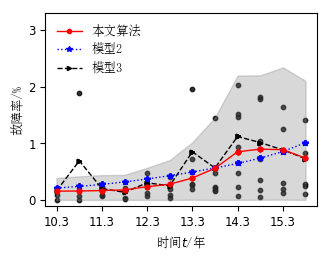

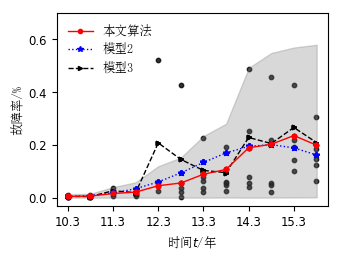

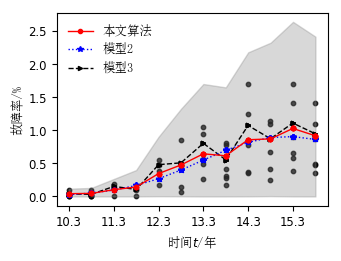

In [28]:
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=9)
ip=0
fig, ax = plt.subplots(figsize=(3.5, 2.5))
x_plot = np.linspace(0.99, 12.01, 12)

ax.scatter(elec_year[:58], elec_faults[:58], marker='o',s=10, color='k', alpha=.8)
ax3, = ax.plot(elec_year[:58], betaMAP3[:58],   'k>--',  markersize=3, linewidth=1)
ax2, = ax.plot(elec_year[:58], betaMAP2[:58],  'b*:',  markersize=4, linewidth=1)
ax1, = ax.plot(elec_year[:58], betaMAP[:58], 'ro-',  markersize=3, linewidth=1)

plt.fill_between(x_plot, sig0[:12,0], sig0[:12,1], color='gray', alpha=.3)
plt.axis([0.5, 12.5, -.1, 3.3])
plt.xticks([1, 3,  5,  7,  9,  11],
  [ '10.3',  '11.3',  '12.3',  '13.3', '14.3',  '15.3'], fontsize='small')
plt.yticks(fontsize='small')
plt.legend([ax1, ax2, ax3], [u'本文算法', u'模型2', u'模型3'], frameon=False, fontsize='small',loc='upper left', prop=font)
plt.xlabel(r"时间$t$/年", fontsize=13, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=13, fontproperties=font)
Savefig=1
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Fitting_new1.png', dpi = 400, bbox_inches='tight')
plt.show()


ip=1
fig, ax = plt.subplots(figsize=(3.5, 2.5))
x_plot = np.linspace(0.99, 12.01, 12)


ax.scatter(elec_year[58:116], elec_faults[58:116], marker='o', s=10,color='k', alpha=.8)

ax3, = ax.plot(elec_year[58:116], betaMAP3B[:],  'k>--', markersize=3, linewidth=1)
ax2, = ax.plot(elec_year[58:116], betaMAP2B[:],  'b*:',markersize=4, linewidth=1)
ax1, = ax.plot(elec_year[58:116], betaMAPB[:], 'ro-', markersize=3, linewidth=1)
plt.fill_between(x_plot, sig1[:12,0], sig1[:12,1], color='gray', alpha=.3) 
plt.axis([0.5, 12.5, -.03, 0.7])
plt.xticks([1, 3,  5,  7,  9,  11],
  [ '10.3',  '11.3',  '12.3',  '13.3', '14.3',  '15.3'], fontsize='small')
ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3'], fontsize='small')
plt.yticks(fontsize='small')
plt.legend([ax1, ax2, ax3], [u'本文算法', u'模型2', u'模型3'], frameon=False, fontsize='small',loc='upper left', prop=font)
plt.xlabel(r"时间$t$/年", fontsize=13, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=13, fontproperties=font)
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Fitting_new2.png', dpi = 400, bbox_inches='tight')

plt.show()


ip=2
fig, ax = plt.subplots(figsize=(3.5, 2.5))
x_plot = np.linspace(0.99, 12.01, 12)

ax.scatter(elec_year[116:], elec_faults[116:], marker='o', s=10, color='k', alpha=.8)
ax3, = ax.plot(elec_year[116:], betaMAP3C[:], 'k>--',  markersize=3, linewidth=1)
ax2, = ax.plot(elec_year[116:], betaMAP2C[:], 'b*:', markersize=4, linewidth=1)
ax1, = ax.plot(elec_year[116:], betaMAPC[:], 'ro-', markersize=3, linewidth=1)
plt.fill_between(x_plot, sig2[:12,0], sig2[:12,1], color='gray', alpha=.3) 

plt.xticks([1, 3,  5,  7,  9,  11],
  [ '10.3',  '11.3',  '12.3',  '13.3', '14.3',  '15.3'], fontsize='small')
plt.yticks(fontsize='small')
plt.legend([ax1, ax2, ax3], [u'本文算法', u'模型2', u'模型3'], frameon=False, fontsize='small',loc='upper left', prop=font)
plt.xlabel(r"时间$t$/年", fontsize=13, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=13, fontproperties=font)

if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Fitting_new3.png', dpi = 400, bbox_inches='tight')
plt.show()

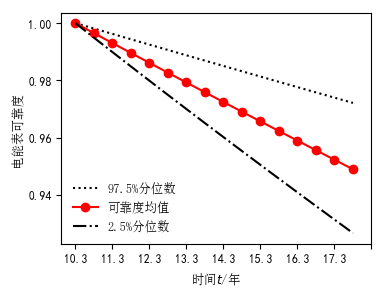

In [32]:
# 可靠度计算，beta_mu要除以100还原
font1 ={'family': 'times new roman', 'weight':'light', 'size': 9}  
R11 = np.loadtxt('R11_reliable.csv',delimiter = ',')
R22 = np.loadtxt('R22_reliable.csv',delimiter = ',')
R33 = np.loadtxt('R33_reliable.csv',delimiter = ',')

t = np.arange(0, 16, 1)
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
plt.plot(t, R22, 'k:', t, R11, 'ro-', t, R33, 'k-.')
# ax.set_xticklabels(['2016', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], fontsize='small')
# ax.set_xlim(-0.5, 12.5)
ax.set_xticks(np.linspace(0,16,9)) 
ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3',  '16.3',  '17.3'], fontsize='small')

plt.yticks(fontsize='small')
plt.xticks(fontsize='small')
# plt.legend([Company_names[0]], loc='upper left', frameon=False, fontsize='small')
ax.legend([u'97.5%分位数',u'可靠度均值',u'2.5%分位数'], loc='lower left',frameon=False, fontsize='small', prop=font)
plt.xlabel(r"时间$t$/年", fontsize=13, fontproperties=font)
plt.ylabel(u"电能表可靠度", fontsize=13, fontproperties=font)
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Reliability_New.png', dpi = 200, bbox_inches='tight')
plt.show()

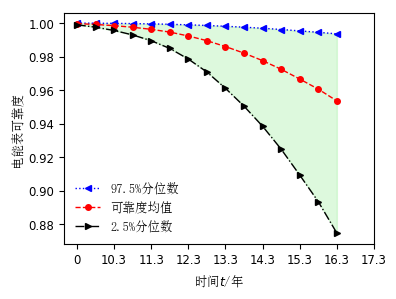

In [34]:
# 可靠度计算，beta_mu要除以100还原
font1 ={'family': 'times new roman', 'weight':'light', 'size': 9}  
R11 = np.loadtxt('Reliabily_AAA.csv',delimiter = ',')
R22 = np.loadtxt('Reliabily_BBB.csv',delimiter = ',')
R33 = np.loadtxt('Reliabily_CCC.csv',delimiter = ',')

t = np.arange(0, 15, 1)
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
# plt.plot(t, R22, 'k:', t, R11, 'ro-', t, R33, 'k-.')
ax.plot(t, R22, 'b<:', markersize=4, linewidth=1)
ax.plot(t, R11, 'ro--', markersize=4, linewidth=1)
ax.plot(t, R33, 'k>-.', markersize=4, linewidth=1)
plt.fill_between(t, R22, R33, color='#90EE90', alpha=.3) 
ax.set_xticks(np.linspace(0,16,9)) 
ax.set_xticklabels(['0', '10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3',  '16.3',  '17.3'], fontsize='small')

plt.yticks(fontsize='small')
plt.xticks(fontsize='small')
# plt.legend([Company_names[0]], loc='upper left', frameon=False, fontsize='small')
ax.legend([u'97.5%分位数',u'可靠度均值',u'2.5%分位数'], loc='lower left',frameon=False, fontsize='small', prop=font)
plt.xlabel(r"时间$t$/年", fontsize=13, fontproperties=font)
plt.ylabel(u"电能表可靠度", fontsize=13, fontproperties=font)
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Reliability_New.png', dpi = 400, bbox_inches='tight')
plt.show()